# Hierarchical Clustering and T-SNE Algorithm
## Author : Ashish Kumar Patra
## 1. Import the Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load the Dataset and Check Details

In [4]:
stocks = pd.read_csv("C:\\Users\\ASHISH\\Desktop\\DataSets\\company-stock.csv")
stocks.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


### i. Check the Size

In [5]:
stocks.shape

(60, 964)

### ii. Subsetting in Stock

In [6]:
movements = stocks.iloc[:,1:]
movements = movements.values
movements

array([[ 5.8000000e-01, -2.2000500e-01, -3.4099980e+00, ...,
        -5.3599620e+00,  8.4001900e-01, -1.9589981e+01],
       [-6.4000200e-01, -6.5000000e-01, -2.1000100e-01, ...,
        -4.0001000e-02, -4.0000200e-01,  6.6000000e-01],
       [-2.3500060e+00,  1.2600090e+00, -2.3500060e+00, ...,
         4.7900090e+00, -1.7600090e+00,  3.7400210e+00],
       ...,
       [ 4.3000100e-01,  2.2999600e-01,  5.7000000e-01, ...,
        -2.6000200e-01,  4.0000100e-01,  4.8000300e-01],
       [ 9.0000000e-02,  1.0000000e-02, -8.0000000e-02, ...,
        -3.0000000e-02,  2.0000000e-02, -3.0000000e-02],
       [ 1.5999900e-01,  1.0001000e-02,  0.0000000e+00, ...,
        -6.0001000e-02,  2.5999800e-01,  9.9998000e-02]])

## 3. Clustering Stocks using K-Means

In [7]:
from sklearn.preprocessing import Normalizer

In [8]:
normalizer = Normalizer()

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)

In [10]:
# Pipeline Chaining Normalizer and K-Means: Pipeline

from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(normalizer,kmeans)

In [11]:
# Fit Pipeline to the Daily Price Movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [13]:
# Which Company Stocks move together

companies = list(stocks.iloc[:,0])
print(companies)

['Apple', 'AIG', 'Amazon', 'American express', 'Boeing', 'Bank of America', 'British American Tobacco', 'Canon', 'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco', 'Chevron', 'DuPont de Nemours', 'Dell', 'Ford', 'General Electrics', 'Google/Alphabet', 'Goldman Sachs', 'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel', 'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark', 'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M', 'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman', 'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris', 'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony', 'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total', 'Taiwan Semiconductor Manufacturing', 'Texas instruments', 'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart', 'Exxon', 'Xerox', 'Yahoo']


In [14]:
# Predict the Cluster Labels
labels = pipeline.predict(movements)

In [16]:
# DataFrame aligning labels and companies
df = pd.DataFrame({'labels': labels, 'companies': companies})
print(df.sort_values('labels'))

    labels                           companies
39       0                              Pfizer
57       0                               Exxon
44       0                        Schlumberger
28       0                           Coca Cola
41       0                       Philip Morris
10       0                      ConocoPhillips
12       0                             Chevron
53       0                       Valero Energy
37       1                            Novartis
42       1                   Royal Dutch Shell
43       1                                 SAP
46       1                      Sanofi-Aventis
49       1                               Total
52       1                            Unilever
19       1                     GlaxoSmithKline
6        1            British American Tobacco
11       2                               Cisco
2        2                              Amazon
3        2                    American express
33       2                           Microsoft
32       2   

## 4. Hierarchies of Stocks

In [17]:
from sklearn.preprocessing import normalize 

In [18]:
normalized_movements = normalize(movements)

In [19]:
# Calculate the linkage: mergings

from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(normalized_movements, method='complete') 

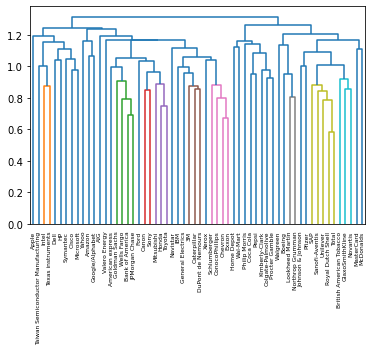

In [20]:
# Plot the Dendrogram

dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()

## 5. A t-SNE Map of the Stock Market

In [21]:
# Import TSNE
from sklearn.manifold import TSNE

# TSNE instance
model = TSNE()

# Apply fit_transform to normalized_movements
tsne_features = model.fit_transform(normalized_movements)

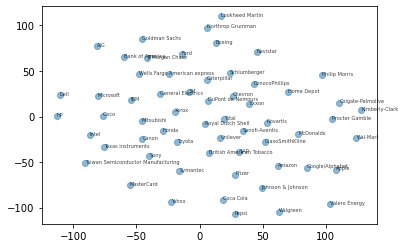

In [29]:
# Select the 0th Feature
xs = tsne_features[:,0]

# Select the 1st Feature
ys = tsne_features[:,1]

# Scatter Plot both the Features (i.e 0th & 1st feature)
plt.scatter(xs,ys, alpha=0.5)
plt.show

# Annotate the Points

for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()